In [1]:
#Add google drive
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:
#Add link to shared cross section library
#shared library was added as a shortcut to My Drive from the web interface
%env OPENMC_CROSS_SECTIONS = /gdrive/My Drive/data/endfb71_hdf5/cross_sections.xml

env: OPENMC_CROSS_SECTIONS=/gdrive/My Drive/data/endfb71_hdf5/cross_sections.xml


In [3]:
#Download miniconda and install
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-12-10 04:53:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   164MB/s    in 0.5s    

2020-12-10 04:53:58 (164 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [4]:
# Install OpenMC
!conda config --add channels conda-forge
!conda install openmc -y

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - openmc


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    cached-property-1.5.1      |             py_0          10 KB  conda-forge
    certifi-2020.12.5          |   py37h89c1867_0         143 KB  conda-forge
    conda-4.9.2                |   py37h89c1867_0         3.0 MB  conda-forge
    cycler-0

In [5]:
import openmc

In [6]:
%matplotlib inline

Define Fuel

In [7]:
#inner_fuel_zone_per = {'U235': 0.0019, 'U238': 0.7509, 'Pu238': 0.0046, 'Pu239': 0.0612, 'Pu240': 0.0383, 'Pu241': 0.0106, 'Pu242': 0.0134, 'Am241': 0.001, 'O16': 0.1181}
#outer_fuel_zone_per = {'U235': 0.0018, 'U238': 0.73, 'Pu238': 0.0053, 'Pu239': 0.0711, 'Pu240': 0.0445, 'Pu241': 0.0124, 'Pu242': 0.0156, 'Am241': 0.0017, 'O16': 0.1175}
#reflector_fuel_zone_per = {'Na23':0.5, 'F19':0.5}

#input density#####10g/cc for most cases; .96g/cc for liquid sodium 

# inner
u235 = openmc.Material(name='U235')
u235.set_density('g/cm3', 10.0)
u235.add_nuclide('U235', 1.0)

u238 = openmc.Material(name='U238')
u238.set_density('g/cm3', 10.0)
u238.add_nuclide('U238', 1.0)

pu238 = openmc.Material(name='Pu238')
pu238.set_density('g/cm3', 10.0)
pu238.add_nuclide('U238', 1.0)


pu239 = openmc.Material(name='U235')
pu239.add_nuclide('Pu239', 1.0)
pu239.set_density('g/cm3', 10.0)

pu240 = openmc.Material(name = 'pu240')
pu240.add_nuclide('Pu240', 1.0)
pu240.set_density('g/cm3', 10.0)

pu241 = openmc.Material(name = 'pu241')
pu241.add_nuclide('Pu241', 1.0)
pu241.set_density('g/cm3', 10.0)


pu242 = openmc.Material(name = 'pu242')
pu242.add_nuclide('Pu242', 1.0)
pu242.set_density('g/cm3', 10.0)

am241 = openmc.Material(name = 'am241')
am241.add_nuclide('Am241', 1.0)
am241.set_density('g/cm3', 10.0)

o16 = openmc.Material(name = 'o16')
o16.add_nuclide('O16', 1.0)
o16.set_density('g/cm3', 10.0)

#gap (liquid sodium?) Sodium gap width inter assembly	0.45 cm
sodium = openmc.Material(name='sodium')
sodium.set_density('g/cm3', 0.96)
sodium.add_nuclide('Na23', 1.0)

#clad (ODS steel); 99.7 wt% (99.3 vol%) Cu, 0.3 wt% (0.7 vol%) Al2O3

cu63 = openmc.Material(name= 'cu63')
cu63.set_density('g/cm3', 10.0)
cu63.add_nuclide('Cu63', 1.0)

Al2O3 = openmc.Material(name='Al2O3')
Al2O3.set_density('g/cm3', 10.0)
Al2O3.add_element('O', 3.0)
Al2O3.add_element('Al', 2.0)



#moderator, liquid sodium?






In [8]:
#mixture
inner = openmc.Material.mix_materials([u235, u238, pu238, pu239, pu240, pu241, pu242, am241, o16],[0.0019, 0.7509, 0.0046, 0.0612, 0.0383, 0.0106, 0.0134, 0.001, 0.1181],'wo')
outer = openmc.Material.mix_materials([u235, u238, pu238, pu239, pu240, pu241, pu242, am241, o16],[0.0018, 0.73, 0.0053, 0.0711, 0.0445, 0.0124, 0.0156, 0.0017, 0.1176],'wo')
clad = openmc.Material.mix_materials([cu63,Al2O3],[0.997,0.003],'wo')


In [30]:

# Instantiate a Materials collection
materials_file = openmc.Materials([inner, outer, sodium, clad])

# Export to "materials.xml"
materials_file.export_to_xml()

#!cat materials.xml


In [10]:
#diameter --> radius
#change (1)
fuel_or = openmc.ZCylinder (r = 0.943/2) 
clad_ir = openmc.ZCylinder (r = 0.973/2) 
clad_or = openmc.ZCylinder (r = 1.073/2) 

#put plane top and bottom so it doesn't go infi; active height 100cm.
top = openmc.ZPlane (z0 = +50, boundary_type = 'vacuum')
bottom = openmc.ZPlane (z0 = -50, boundary_type = 'vacuum') 
 
#mod_hexgonal = openmc.hexagonal_prism(edge_length = 1.34, orientation = 'y', boundary_type = 'reflective') #did not use this time, change(2)

fuel_region = -fuel_or & -top & +bottom #below is minus, above is plus; 
gap_region = +fuel_or & -clad_ir  & -top & +bottom
clad_region = +clad_ir & -clad_or  & -top & +bottom
#change(2)
moderator_region = +clad_or & -top & +bottom 
 
gap_cell = openmc.Cell(fill=inner ,region=gap_region)
clad_cell = openmc.Cell (fill = clad, region = clad_region)
sodium_cell = openmc.Cell(fill=sodium, region = moderator_region)




In [11]:
#geo of inner
inner_fuel_cell = openmc.Cell(fill = inner, region = fuel_region)
inner_u = openmc.Universe(cells = (inner_fuel_cell, gap_cell, clad_cell, sodium_cell))

geom = openmc.Geometry(inner_u)
geom.export_to_xml()



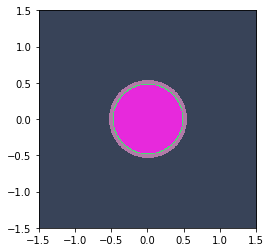

In [12]:
inner_u.plot(pixels=(500, 500), width = (3,3))

In [13]:
lower_left = [-0.63, -0.63, -182.88]
upper_right = [0.63, 0.63, 182.88]
uniform_dist = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
src = openmc.Source(space=uniform_dist)

settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>1000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source strength="1.0">
    <space type="fission">
      <parameters>-0.63 -0.63 -182.88 0.63 0.63 182.88</parameters>
    </space>
  </source>
</settings>


In [14]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [15]:
#geo of outer
outer_fuel_cell = openmc.Cell(fill = outer, region = fuel_region)
outer_u = openmc.Universe(cells = (outer_fuel_cell, gap_cell, clad_cell, sodium_cell))

geom = openmc.Geometry(inner_u)
geom.export_to_xml()

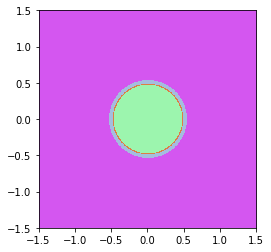

In [16]:
outer_u.plot(pixels=(500, 500), width=(3,3))

In [17]:
#geo of reflector

#sodium_cell = openmc.Cell(fill=sodium, region = moderator_region)
#ref_u = openmc.Universe(cells = (sodium_cell, gap_cell, clad_cell, sodium_cell))

#geom = openmc.Geometry(ref_u)
#geom.export_to_xml()

In [18]:
#ref_u.plot(pixels=(500, 500), width=(3,3))

In [19]:
lower_left = [-0.63, -0.63, -182.88]
upper_right = [0.63, 0.63, 182.88]
uniform_dist = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
src = openmc.Source(space=uniform_dist)

settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 10

settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>10</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source strength="1.0">
    <space type="fission">
      <parameters>-0.63 -0.63 -182.88 0.63 0.63 182.88</parameters>
    </space>
  </source>
</settings>


In [20]:
#openmc.run()

In [21]:
#inner cell assembly
#lattices 
#name all lattice id
in_lat = openmc.HexLattice(name = 'inner assembly')

in_lat.center = (0., 0.)
in_lat.pitch = (21.08/17,) #in cm, 21.08 is pitch of assembly filled into full core
in_lat.orientation = 'x'

#print(lat.show_indices(9))

#

#in_cell rings

inone = [inner_u]*48
intwo = [inner_u]*42
inthree = [inner_u]*36
infour = [inner_u]*30
infive = [inner_u]*24
insix = [inner_u]*18
inseven = [inner_u]*12
ineight = [inner_u]*6
innine = [inner_u]*1
in_lat.universes = [inone,intwo,inthree,infour,infive,insix,inseven,ineight,innine]

#
outer_in_surface = openmc.model.hexagonal_prism(edge_length=12.1705) #change(3), diff edge_length
#21.08 for 12 rings

main_in_assembly = openmc.Cell(fill = in_lat, region = outer_in_surface & -top & +bottom)
out_in_assembly = openmc.Cell(fill = sodium, region = ~outer_in_surface  & -top & +bottom)


main_in_u = openmc.Universe (cells = [main_in_assembly]) # out_assembly

geom = openmc.Geometry (main_in_u)
geom.export_to_xml()

#main_in_u.plot(origin = (0,0,0), pixels=(500, 500), width = (30.,30.), color_by = 'material')

In [22]:
#outer cell assembly
#lattices 

out_lat = openmc.HexLattice(name = 'outer assembly')

out_lat.center = (0., 0.)
out_lat.pitch = (21.08/17,) #in cm, 21.08 is pitch of assembly filled into full core
out_lat.orientation = 'x'

#print(lat.show_indices(9))

#

#in_cell rings

outone = [outer_u]*48
outtwo = [outer_u]*42
outthree = [outer_u]*36
outfour = [outer_u]*30
outfive = [outer_u]*24
outsix = [outer_u]*18
outseven = [outer_u]*12
outeight = [outer_u]*6
outnine = [outer_u]*1
out_lat.universes = [outone,outtwo,outthree,outfour,outfive,outsix,outseven,outeight,outnine]

#
outer_out_surface = openmc.model.hexagonal_prism(edge_length=12.1705) #change(3), diff edge_length
#21.08 for 12 rings

main_out_assembly = openmc.Cell(fill = out_lat, region = outer_out_surface  & -top & +bottom )
out_out_assembly = openmc.Cell(fill = sodium, region = ~outer_out_surface)


main_out_u = openmc.Universe (cells = [main_out_assembly]) # out_assembly

geom = openmc.Geometry (main_out_u)
geom.export_to_xml()

#main_out_u.plot(origin = (0,0,0), pixels=(500, 500), width = (30.,30.), color_by = 'material')

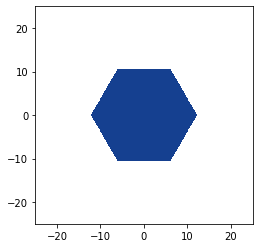

In [23]:
#reflector assembly
reflector_assembly = openmc.model.hexagonal_prism(edge_length=12.1705, orientation='x')

ref_cell = openmc.Cell(fill = sodium, region = reflector_assembly)

ref_u = openmc.Universe (cells = [ref_cell])
geom = openmc.Geometry (ref_u)
geom.export_to_xml()

ref_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50.,50.), color_by = 'material')


In [24]:
# big core lattice

In [25]:
#lattices 

lat = openmc.HexLattice(name = 'core')

lat.center = (0., 0.)
lat.pitch = (21.08,) #in cm, 21.08 is pitch of assembly filled into full core


#print(lat.show_indices(17))

In [26]:
#rings
ref_one = [ref_u] * 96
ref_two = [ref_u] * 90
ref_three = [ref_u] * 84
ref_four = ([ref_u] * 5 + [main_out_u] * 4 + [ref_u] * 4) * 6
ref_five = ([ref_u] + [main_out_u] * 11) * 6
out_one = [main_out_u]*66
out_two = [main_out_u]*60
out_three = ([main_out_u]*2 + [main_in_u]*6 + [main_out_u] * 1)*6
in_one = [main_in_u]*48
in_two = [main_in_u]*42
in_three = [main_in_u]*36
in_four = [main_in_u]*30
in_five = [main_in_u]*24
in_six = [main_in_u]*18
in_seven = [main_in_u]*12
in_eight = [main_in_u]*6
in_nine = [main_in_u]*1
lat.universes = [ref_one, ref_two, ref_three, ref_four, ref_five,out_one,out_two,out_three,in_one,in_two,in_three,in_four,in_five,in_six,in_seven,in_eight,in_nine]

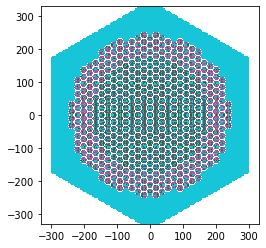

In [27]:
outer_surface = openmc.model.hexagonal_prism(edge_length=347.82, boundary_type = 'vacuum') #change(3), diff edge_length
#21.08 for 12 rings #edge = 347.82

core = openmc.Cell(fill = lat, region = outer_surface)
#out_assembly = openmc.Cell(fill = outer, region = ~outer_surface)


main_u = openmc.Universe (cells = [core]) # out_assembly

geom = openmc.Geometry (main_u)
geom.export_to_xml()

main_u.plot(origin = (0,0,0), pixels=(1000, 1000), width = (660.,660.), color_by = 'material')

In [28]:
lower_left = [-0.63, -0.63, -182.88]
upper_right = [0.63, 0.63, 182.88]
uniform_dist = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
src = openmc.Source(space=uniform_dist)

settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>1000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source strength="1.0">
    <space type="fission">
      <parameters>-0.63 -0.63 -182.88 0.63 0.63 182.88</parameters>
    </space>
  </source>
</settings>


In [29]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

CalledProcessError: ignored